# Data cleaning and operationalization

I'm going to introduce a dataset of vehicle crashes in Indiana, show how to import it into pandas, and give examples of a few ways of exploring this data.

**Download the data from [here](https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true)**. I created this CSV file from [this full dataset](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/cc90589c-72d8-4d92-a5fe-73254b555c73) by filtering out many of the columns to make it small enough to easily fit in memory.

A description of the columns is [here](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/f61a5dcb-5ca3-485a-9ecf-cd3d8740dc9b?inner_span=True).

Then, I want you to form groups of 2-4 where you identify a hypothesis about this data, brainstorm a visualization or set of visualizations that would give you insight into your hypothesis, and then try to create that visualization in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This code downloads the CSV every time it's run.
# Instead, you may want to download the CSV to your computer, and load it from there
# You can use the same code, just change the path to where you download it
raw_df = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true')

In [3]:
raw_df = raw_df[raw_df.PERSONTYPEDESCR != 'Owner Vehicle']

In [4]:
grouped = raw_df.sort_values(['COLLDTE', 'COLLISION_TIME']).groupby("INDIVIDUAL_MR_RECORD")

# For example, this is a simple test of the number of unique weather descriptions per group.
sum(grouped.WEATHERDESCR.nunique() > 1)

0

In [5]:
# Get the first entry for each of these
coll_df = pd.DataFrame({"date" : grouped.COLLDTE.first(),
                        "time": grouped.COLLISION_TIME.first() + grouped.COLLISION_TIME_AM_PM.first(), 
                        "injured": grouped.INJUREDNMB.first(),
                        "deceased": grouped.DEADNMB.first(),
                        "weather": grouped.WEATHERDESCR.first(),
                        "accident_count": 1
                       })

coll_df

,date,time,injured,deceased,weather,accident_count
INDIVIDUAL_MR_RECORD,,,,,,
903070479,2018-01-01,12:03AM,3.0,0.0,Cloudy,1
903070487,2018-01-01,12:48AM,0.0,0.0,Snow,1
903070491,2018-01-01,12:57AM,0.0,0.0,Clear,1
903070495,2018-01-01,12:45AM,0.0,0.0,Snow,1
903070497,2018-01-01,12:26AM,0.0,0.0,Snow,1
...,...,...,...,...,...,...
903377525,2018-12-26,03:02PM,0.0,0.0,Clear,1
903377671,2018-12-27,09:45PM,0.0,0.0,Cloudy,1
903384692,2018-12-31,05:57PM,0.0,0.0,Snow,1


In [8]:
coll_df.index = pd.to_datetime(coll_df.date + ' ' + coll_df.time)

In [9]:
def get_mode(x):
    return x.mode()

In [10]:
accidents_per_day = coll_df.groupby(coll_df.index.date).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    # And accidents which is the number of accidents that day
    accidents = ('accident_count', sum))

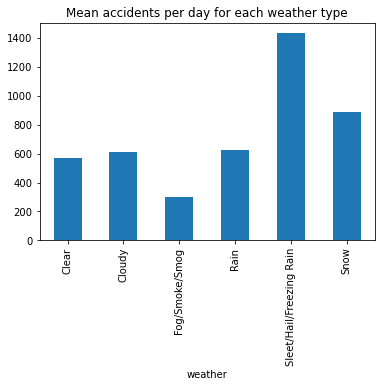

In [11]:
accidents_per_day.groupby('weather').accidents.mean().plot.bar();
plt.title('Mean accidents per day for each weather type');

## Exercises

1. How would you create the above plot in Seaborn instead?

AttributeError: 'FacetGrid' object has no attribute 'xticks'

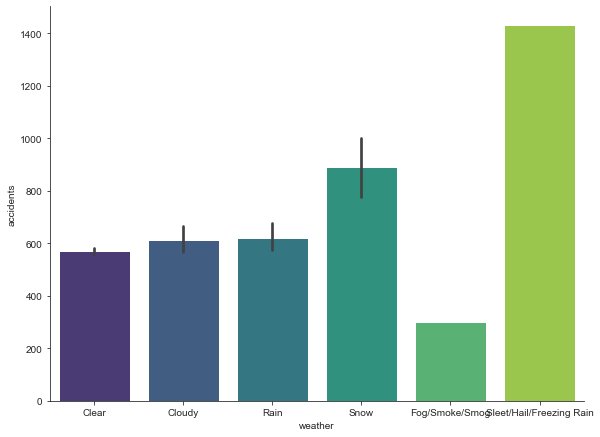

In [16]:
sns.set_style("ticks")
accidents_per_day.head()

sns.catplot(data=accidents_per_day, kind="bar",
    x="weather", y="accidents", #hue="sex",
    palette="viridis", height=6, aspect=11/8);
xticks(rotation=45);

2. Find a question that you'd like to answer with this data or the reddit data. Figure out how to filter/clean/group the data to produce the summary data that will help you to find that answer, and produce a visualization.

In [17]:
raw_df = raw_df[raw_df.PERSONTYPEDESCR == 'Driver']
grouped = raw_df.sort_values(['COLLDTE', 'COLLISION_TIME']).groupby("INDIVIDUAL_MR_RECORD")

Text(0.5, 1.0, 'Female')

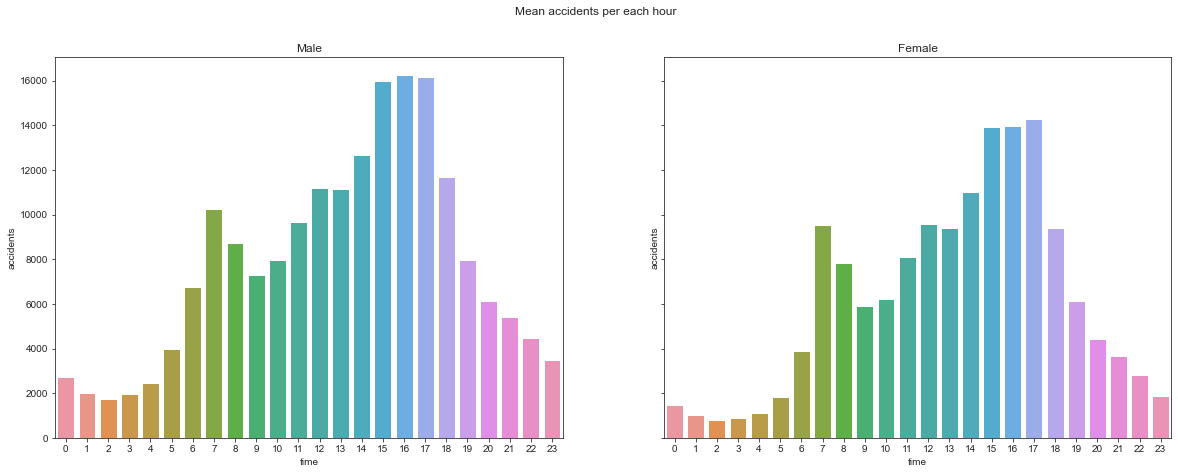

In [18]:
time_df = pd.DataFrame({"date" : raw_df.COLLDTE,
                        "time": raw_df.COLLISION_TIME + raw_df.COLLISION_TIME_AM_PM, 
                        "injured": raw_df.INJUREDNMB,
                        "deceased": raw_df.DEADNMB,
                        "weather": raw_df.WEATHERDESCR,
                        "age": raw_df.AGE_GRP,
                        "gender": raw_df.GENDERCDE,
                        "accident_count": 1,
                        "driver" : raw_df.PERSONTYPEDESCR
                       }) #our dataframe
time_df.index = pd.to_datetime(time_df.date + ' ' + time_df.time)

m_time_df = time_df[time_df.gender == 'M']
f_time_df = time_df[time_df.gender == 'F']

m_accidents_per_time = pd.DataFrame({'time' : [], 'accidents' : [], 'gender' : []})
time_count = 0
time = []
accidents = []
gender = []

acc_per_time = m_time_df.groupby(m_time_df.index.hour).accident_count.sum()
for acc in acc_per_time:
    time.append(time_count)
    accidents.append(acc)
    gender.append('M')
    time_count = time_count + 1
m_accidents_per_time['time'] = time
m_accidents_per_time['accidents'] = accidents
m_accidents_per_time['gender'] = gender

f_accidents_per_time = pd.DataFrame({'time' : [], 'accidents' : [], 'gender' : []})
time_count = 0
time = []
accidents = []
gender = []
f_acc_per_time = f_time_df.groupby(f_time_df.index.hour).accident_count.sum()
for acc in f_acc_per_time:
    time.append(time_count)
    accidents.append(acc)
    gender.append('F')
    time_count = time_count + 1
f_accidents_per_time['time'] = time
f_accidents_per_time['accidents'] = accidents
f_accidents_per_time['gender'] = gender

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 7))
fig.suptitle("Mean accidents per each hour")

sns.barplot(ax=axes[0], x='time', y='accidents', data = m_accidents_per_time)
axes[0].set_title('Male')

sns.barplot(ax=axes[1], x='time', y='accidents', data = f_accidents_per_time)
axes[1].set_title('Female')

Text(0.5, 1.0, 'Female')

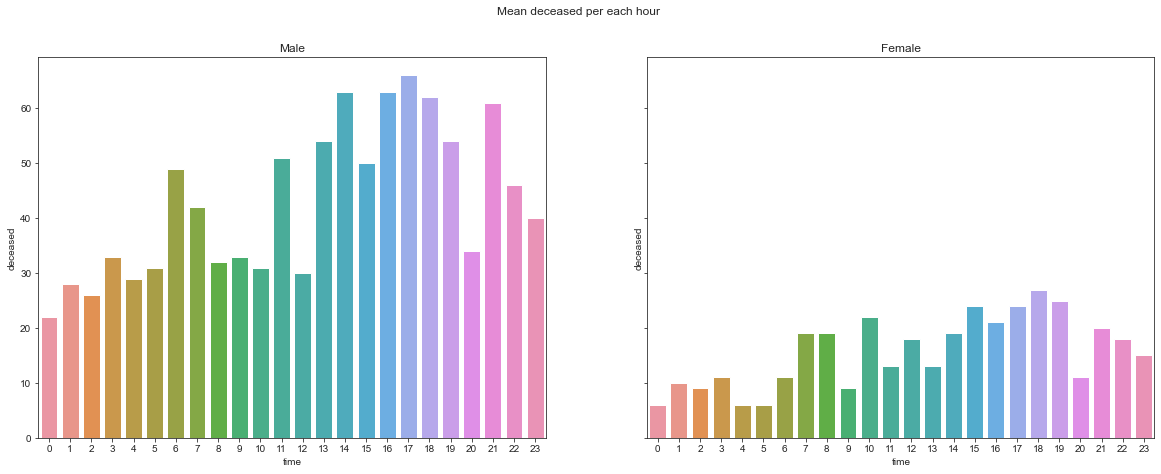

In [19]:
time_df.index = pd.to_datetime(time_df.date + ' ' + time_df.time)

m_time_df = time_df[time_df.gender == 'M']
f_time_df = time_df[time_df.gender == 'F']

m_deceased_per_time = pd.DataFrame({'time' : [], 'deceased' : [], 'gender' : []})
time_count = 0
time = []
deceased = []
gender = []

dec_per_time = m_time_df.groupby(m_time_df.index.hour).deceased.sum()
for acc in dec_per_time:
    time.append(time_count)
    deceased.append(acc)
    gender.append('M')
    time_count = time_count + 1
m_deceased_per_time['time'] = time
m_deceased_per_time['deceased'] = deceased
m_deceased_per_time['gender'] = gender

f_deceased_per_time = pd.DataFrame({'time' : [], 'deceased' : [], 'gender' : []})
time_count = 0
time = []
deceased = []
gender = []
f_dec_per_time = f_time_df.groupby(f_time_df.index.hour).deceased.sum()
for acc in f_dec_per_time:
    time.append(time_count)
    deceased.append(acc)
    gender.append('F')
    time_count = time_count + 1
f_deceased_per_time['time'] = time
f_deceased_per_time['deceased'] = deceased
f_deceased_per_time['gender'] = gender

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 7))
fig.suptitle("Mean deceased per each hour")

sns.barplot(ax=axes[0], x='time', y='deceased', data = m_deceased_per_time)
axes[0].set_title('Male')

sns.barplot(ax=axes[1], x='time', y='deceased', data = f_deceased_per_time)
axes[1].set_title('Female')